## Importing all the neccesarry libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# I. Fuel Type wise vehicle registration in India 
The data has been categorized into fuel variant of the vehicle registered into the following.
- Only CNG
- Diesel
- Diesel/Hybrid
- Dual Diesel/CNG
- Electric(BOV)
- Ethanol
- LPG Only
- Petrol
- Petrol/CNG
- Petrol/Ethanol
- Petrol/Hybrid
- Petrol/LPG
- Solar
- Fuel cell Hydrogen
- LNG
- Methanol
- Dual Diesel/LNG


## Loading the Fuel Type wise vehicle registration dataset 

In [5]:
datasetFuelType = pd.read_csv("Fuel type Registration of Vehicles.csv")

In [8]:
datasetFuelType.head()

,Month,CNG ONLY,DIESEL,DIESEL/HYBRID,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/HYBRID,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG
0,Jan-14,2103,270915,3,0,232,0,188,10278,1347016,20623,0,0,6307,9,0,0,0,0
1,Feb-14,1607,219601,3,1,171,1,116,8884,1176669,15266,0,1,4803,17,0,0,0,0
2,Mar-14,2026,258723,3,1,220,1,106,11115,1329273,18800,0,0,5609,16,0,0,0,0
3,Apr-14,1718,222632,3,1,252,0,121,8522,1296500,19714,1,0,5600,19,0,0,0,0
4,May-14,1727,237336,6,0,186,2,103,9656,1408836,20626,0,1,6317,14,0,0,0,0


## Exploring the Dataset

In [11]:
datasetFuelType.columns.tolist()

['Month',
 'CNG ONLY',
 'DIESEL',
 'DIESEL/HYBRID',
 'DUAL DIESEL/CNG',
 'ELECTRIC(BOV)',
 'ETHANOL',
 'LPG ONLY',
 'NOT APPLICABLE',
 'PETROL',
 'PETROL/CNG',
 'PETROL/ETHANOL',
 'PETROL/HYBRID',
 'PETROL/LPG',
 'SOLAR',
 'FUEL CELL HYDROGEN',
 'LNG',
 'METHANOL',
 'DUAL DIESEL/LNG']

In [13]:
datasetFuelType.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Month               115 non-null    object
 1   CNG ONLY            115 non-null    int64 
 2   DIESEL              115 non-null    int64 
 3   DIESEL/HYBRID       115 non-null    int64 
 4   DUAL DIESEL/CNG     115 non-null    int64 
 5   ELECTRIC(BOV)       115 non-null    int64 
 6   ETHANOL             115 non-null    int64 
 7   LPG ONLY            115 non-null    int64 
 8   NOT APPLICABLE      115 non-null    int64 
 9   PETROL              115 non-null    int64 
 10  PETROL/CNG          115 non-null    int64 
 11  PETROL/ETHANOL      115 non-null    int64 
 12  PETROL/HYBRID       115 non-null    int64 
 13  PETROL/LPG          115 non-null    int64 
 14  SOLAR               115 non-null    int64 
 15  FUEL CELL HYDROGEN  115 non-null    int64 
 16  LNG                 115 no

In [15]:
datasetFuelType.shape

(115, 19)

In [17]:
print(pd.isnull(datasetFuelType).sum())

Month                 0
CNG ONLY              0
DIESEL                0
DIESEL/HYBRID         0
DUAL DIESEL/CNG       0
ELECTRIC(BOV)         0
ETHANOL               0
LPG ONLY              0
NOT APPLICABLE        0
PETROL                0
PETROL/CNG            0
PETROL/ETHANOL        0
PETROL/HYBRID         0
PETROL/LPG            0
SOLAR                 0
FUEL CELL HYDROGEN    0
LNG                   0
METHANOL              0
DUAL DIESEL/LNG       0
dtype: int64


In [19]:
datasetFuelType["Month"]=pd.to_datetime(datasetFuelType["Month"], format='%b-%y')
datasetFuelType["Month"].head()

0   2014-01-01
1   2014-02-01
2   2014-03-01
3   2014-04-01
4   2014-05-01
Name: Month, dtype: datetime64[ns]

In [21]:
datasetFuelType['HYBRID COMBINED'] = datasetFuelType['PETROL/HYBRID'] + datasetFuelType['DIESEL/HYBRID']

# Dropping 'PETROL/HYBRID' and 'DIESEL/HYBRID' columns
datasetFuelType.drop(['PETROL/HYBRID', 'DIESEL/HYBRID'], axis=1, inplace=True)

In [23]:
datasetFuelType

,Month,CNG ONLY,DIESEL,DUAL DIESEL/CNG,ELECTRIC(BOV),ETHANOL,LPG ONLY,NOT APPLICABLE,PETROL,PETROL/CNG,PETROL/ETHANOL,PETROL/LPG,SOLAR,FUEL CELL HYDROGEN,LNG,METHANOL,DUAL DIESEL/LNG,HYBRID COMBINED
0,2014-01-01,2103,270915,0,232,0,188,10278,1347016,20623,0,6307,9,0,0,0,0,3
1,2014-02-01,1607,219601,1,171,1,116,8884,1176669,15266,0,4803,17,0,0,0,0,4
2,2014-03-01,2026,258723,1,220,1,106,11115,1329273,18800,0,5609,16,0,0,0,0,3
3,2014-04-01,1718,222632,1,252,0,121,8522,1296500,19714,1,5600,19,0,0,0,0,3
4,2014-05-01,1727,237336,0,186,2,103,9656,1408836,20626,0,6317,14,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2023-03-01,34392,239185,0,140895,0,1699,4847,1562953,32745,12776,658,0,0,23,0,0,38240
111,2023-04-01,29921,197337,0,111327,0,1545,4336,1323102,31801,18139,347,0,0,11,0,0,28058
112,2023-05-01,30945,207305,0,158336,0,1998,4280,1548095,37213,25678,208,0,0,22,0,0,26299
113,2023-06-01,34552,225327,0,102409,0,2167,4860,1410875,41391,31854,121,0,0,13,0,0,26529


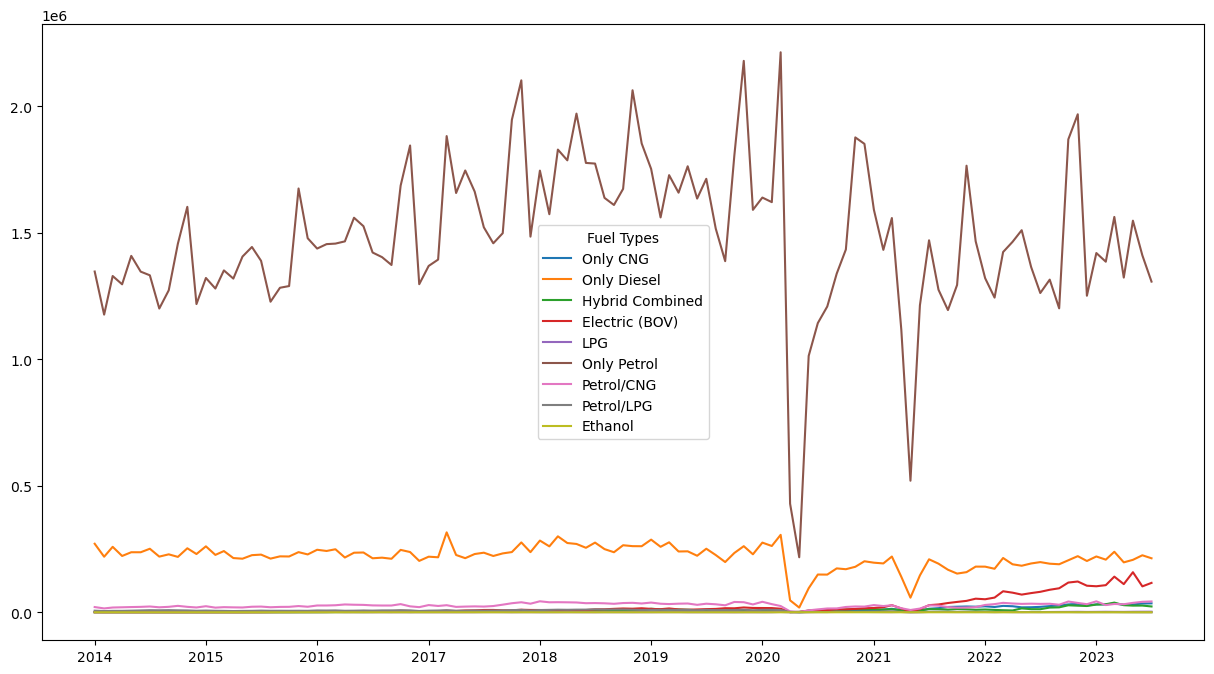

In [25]:
plt.figure(figsize=(15,8))

plt.plot(datasetFuelType["Month"],datasetFuelType["CNG ONLY"], label='Only CNG')
plt.plot(datasetFuelType["Month"],datasetFuelType['DIESEL'], label='Only Diesel')
plt.plot(datasetFuelType["Month"],datasetFuelType['HYBRID COMBINED'], label='Hybrid Combined')
plt.plot(datasetFuelType["Month"],datasetFuelType['ELECTRIC(BOV)'], label='Electric (BOV)')
plt.plot(datasetFuelType["Month"],datasetFuelType['LPG ONLY'], label='LPG')
plt.plot(datasetFuelType["Month"],datasetFuelType['PETROL'], label='Only Petrol')
plt.plot(datasetFuelType["Month"],datasetFuelType['PETROL/CNG'], label='Petrol/CNG')
plt.plot(datasetFuelType["Month"],datasetFuelType['PETROL/LPG'], label='Petrol/LPG')
plt.plot(datasetFuelType["Month"],datasetFuelType['ETHANOL'], label='Ethanol')

plt.legend(title="Fuel Types", loc="best")
plt.show()

**Based upon the graph, we can see that:**

- Petrol vehicles consistently have the highest registrations throughout the time period, indicating their dominance in the market.
- Diesel vehicle registrations remain relatively stable over time, suggesting a consistent demand for diesel-powered vehicles.
- Electric vehicles show an increasing trend in registrations over time, indicating a growing interest or adoption of electric mobility, from **late 2021 onwards**.
- The increasing trend in EV registrations suggests a potential shift in the market toward cleaner and more sustainable transportation options.

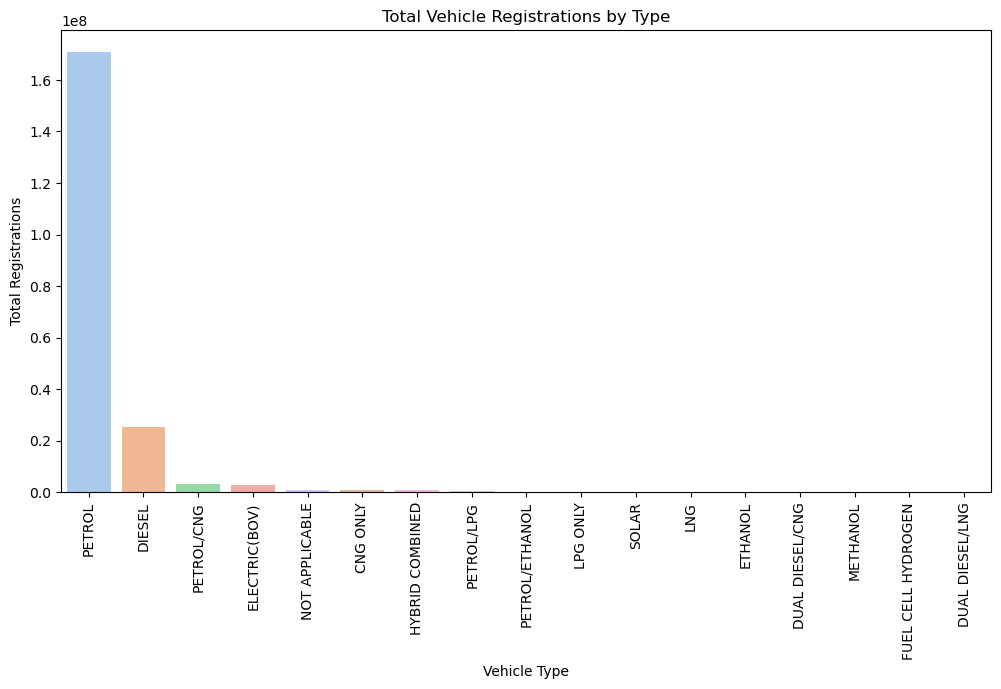

In [28]:
columnsInterest = datasetFuelType.columns

# Create a subset of the DataFrame with the specified columns
selectedColumns = datasetFuelType[columnsInterest]
selectedColumns = selectedColumns.drop('Month', axis=1, errors='ignore')
totalRegistration = selectedColumns.sum()

# Sorting the columns based on total registration in descending order
sortedColumns = totalRegistration.sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=sortedColumns.index, y=sortedColumns.values, palette='pastel')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Type')
plt.ylabel('Total Registrations')
plt.title('Total Vehicle Registrations by Type')
plt.show()

**Based upon the above visualization, we can see that:**

- The Indian vehicle market is still heavily reliant on traditional petrol and diesel fuels.
- Electric vehicles are witnessing significant growth, but widespread adoption requires overcoming challenges like infrastructure limitations and affordability.

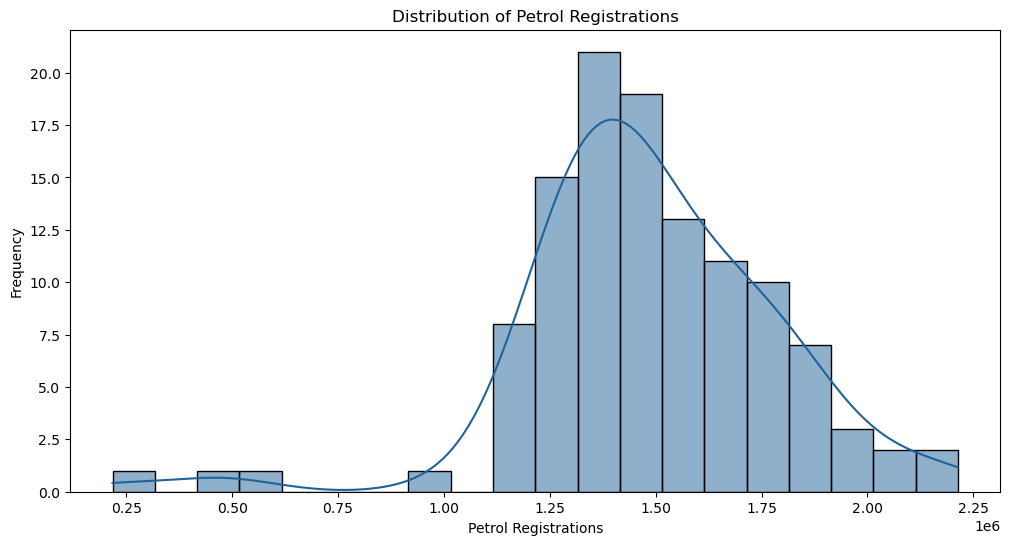

In [31]:
# Visualize distribution of numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(datasetFuelType['PETROL'], bins=20, kde=True, color='#206399')
plt.title('Distribution of Petrol Registrations')
plt.xlabel('Petrol Registrations')
plt.ylabel('Frequency')
plt.show()

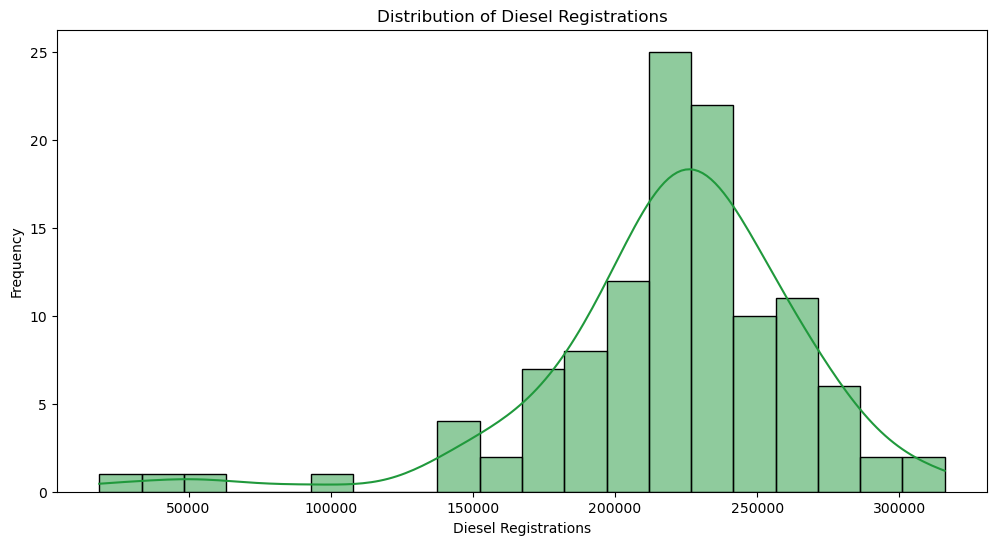

In [33]:
# Visualize distribution of numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(datasetFuelType['DIESEL'], bins=20, kde=True, color='#20993c')
plt.title('Distribution of Diesel Registrations')
plt.xlabel('Diesel Registrations')
plt.ylabel('Frequency')
plt.show()

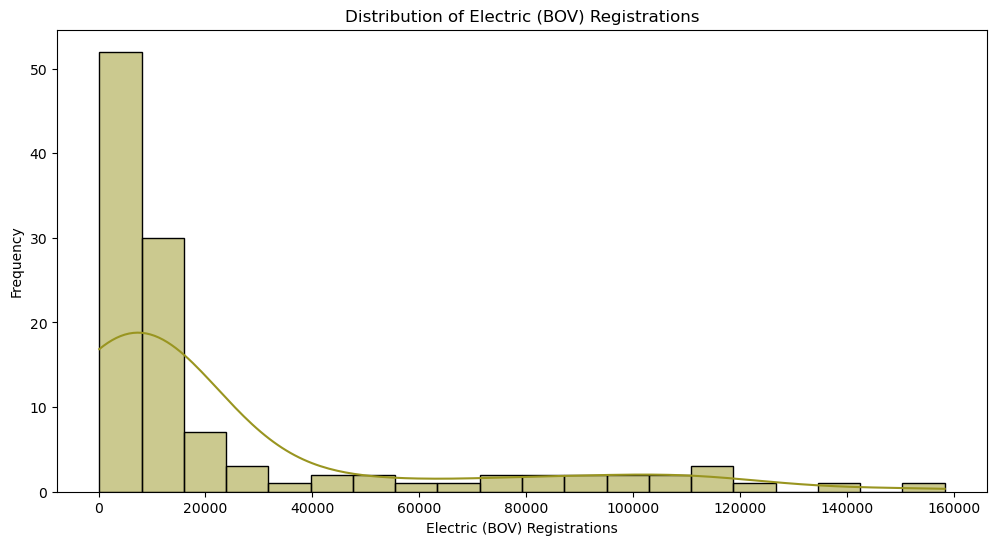

In [35]:
# Visualize distribution of numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(datasetFuelType['ELECTRIC(BOV)'], bins=20, kde=True, color='#999520')
plt.title('Distribution of Electric (BOV) Registrations')
plt.xlabel('Electric (BOV) Registrations')
plt.ylabel('Frequency')
plt.show()

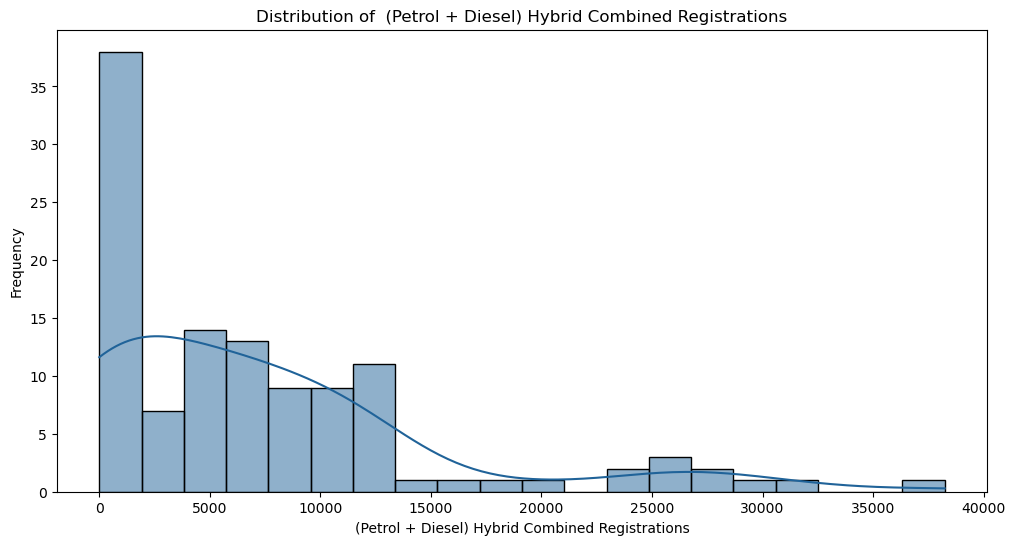

In [37]:
# Visualize distribution of numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(datasetFuelType['HYBRID COMBINED'], bins=20, kde=True, color='#206399')
plt.title('Distribution of  (Petrol + Diesel) Hybrid Combined Registrations')
plt.xlabel('(Petrol + Diesel) Hybrid Combined Registrations')
plt.ylabel('Frequency')
plt.show()

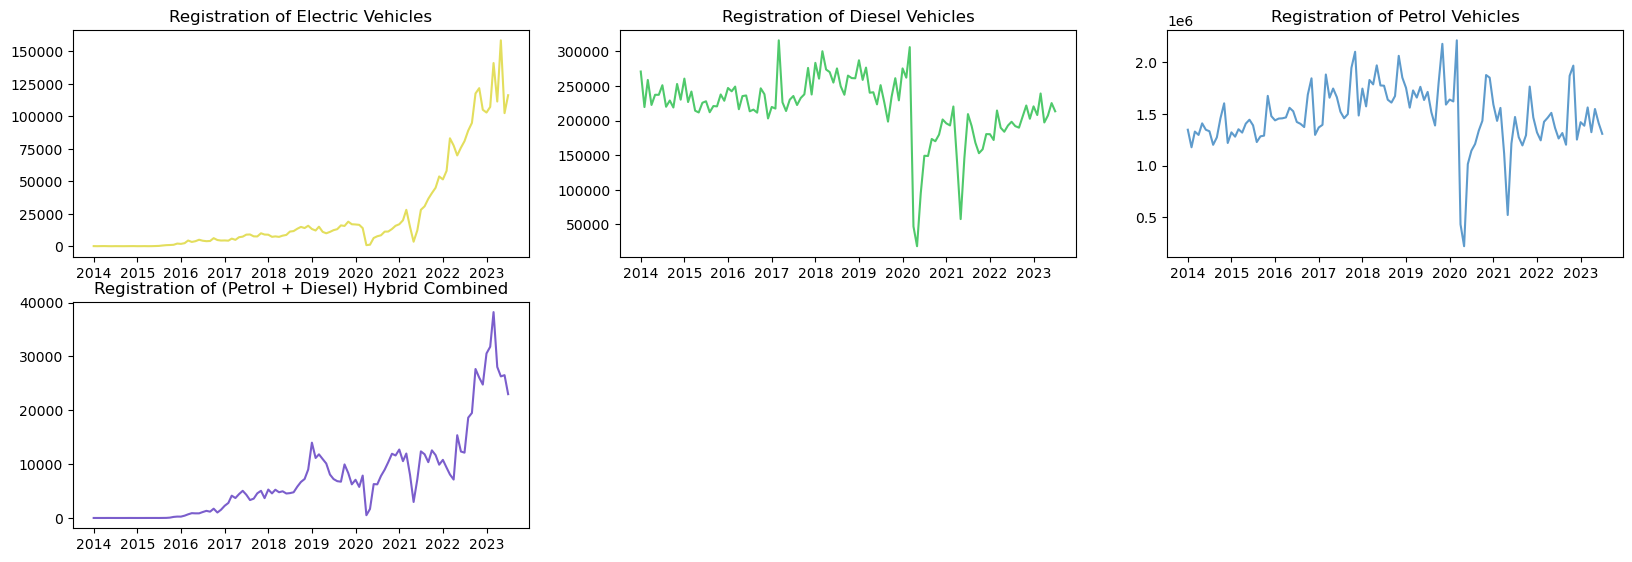

In [39]:
plt.figure(figsize=(20,10))
plt.subplot(3,3,1)
plt.plot(datasetFuelType['Month'],datasetFuelType['ELECTRIC(BOV)'], color = '#e3de5d')
plt.title('Registration of Electric Vehicles')
plt.subplot(3,3,2)
plt.plot(datasetFuelType['Month'],datasetFuelType['DIESEL'], color = '#4fc96b')
plt.title('Registration of Diesel Vehicles')
plt.subplot(3,3,3)
plt.plot(datasetFuelType['Month'],datasetFuelType['PETROL'], color = '#5e9bcc')
plt.title('Registration of Petrol Vehicles')
plt.subplot(3,3,4)
plt.plot(datasetFuelType['Month'], datasetFuelType['HYBRID COMBINED'], color = '#7b5ecc')
plt.title('Registration of (Petrol + Diesel) Hybrid Combined')
plt.show()

- Out of all the four variants of fuel type, the registrations of **Electric Vehicles** and **Hybrid Vehicles** show a noticeable increasing trend over the time period and seems to suggest a growing market in the near future.
- The upward trend may indicate a shift in consumer preferences towards more sustainable and environmentally friendly transportation options.
- The consistent demand for the remaining vehicles suggests a stable market presence, possibly driven by specific industry requirements or consumer preferences.

In [42]:
finalColumns = ['Month', 'DIESEL', 'HYBRID COMBINED','ELECTRIC(BOV)','PETROL']
finalDatasetFuelType = datasetFuelType.loc[:,finalColumns]
finalDatasetFuelType

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL
0,2014-01-01,270915,3,232,1347016
1,2014-02-01,219601,4,171,1176669
2,2014-03-01,258723,3,220,1329273
3,2014-04-01,222632,3,252,1296500
4,2014-05-01,237336,7,186,1408836
...,...,...,...,...,...
110,2023-03-01,239185,38240,140895,1562953
111,2023-04-01,197337,28058,111327,1323102
112,2023-05-01,207305,26299,158336,1548095
113,2023-06-01,225327,26529,102409,1410875


<Figure size 1000x800 with 0 Axes>

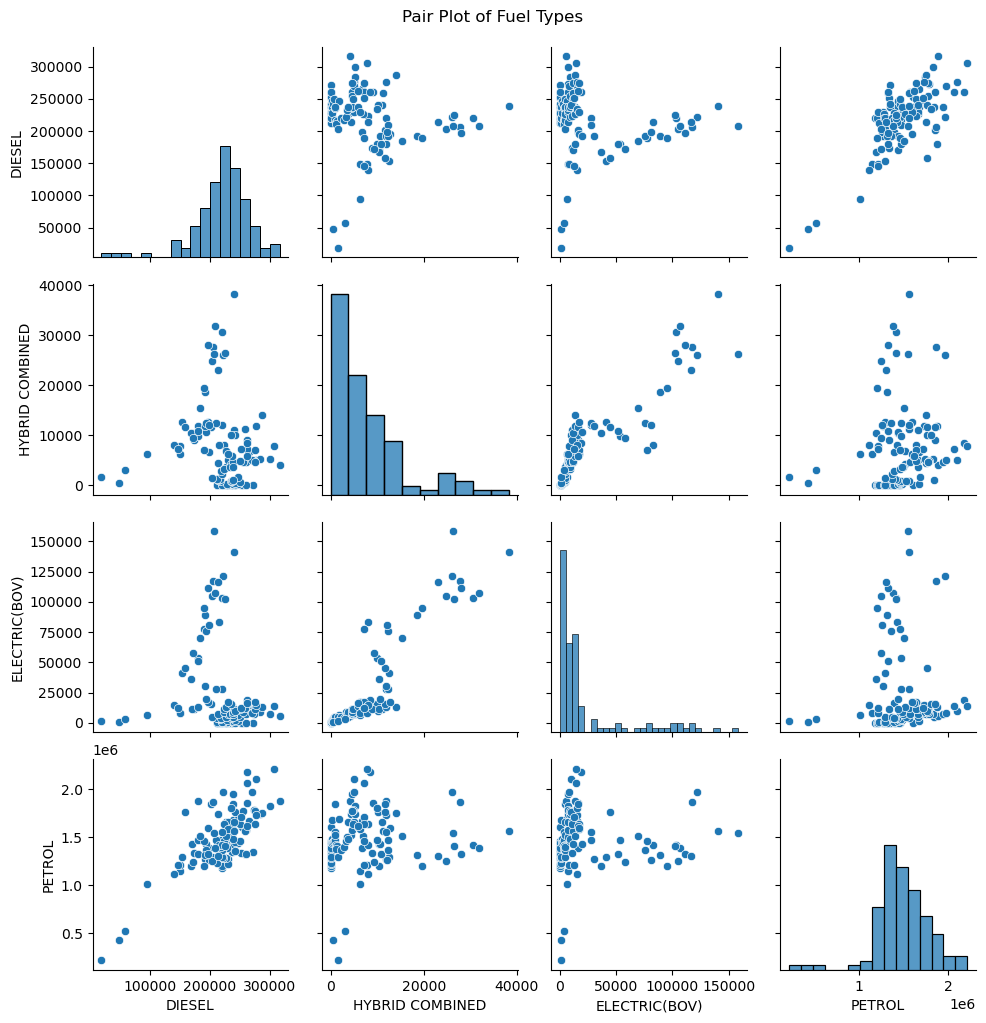

In [44]:
# Explore relationships between variables
plt.figure(figsize=(10, 8))
sns.pairplot(finalDatasetFuelType)
plt.suptitle('Pair Plot of Fuel Types', y=1.02)
plt.show()

### Correlation Matrix

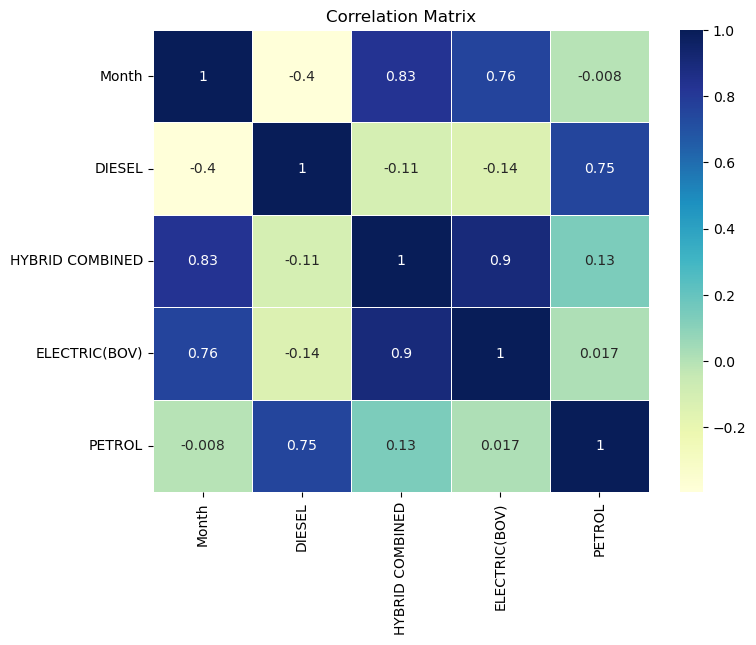

In [47]:
correlation_matrix = finalDatasetFuelType.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- **Strong positive correlation** exists between "DIESEL" and "PETROL" (0.87), suggesting that these fuel types tend to move together in terms of their values.
- **Moderate positive correlation** exists between "HYBRID COMBINED" and "PETROL" (0.54) and "HYBRID COMBINED" and "ELECTRIC(BOV)" (0.44), indicating some degree of co-occurrence.
- **A weak positive correlation** exists between "Year" and "ELECTRIC(BOV)" (0.23), suggesting a possible increase in electric vehicles over time.
- **A strong negative correlation** exists between "ELECTRIC(BOV)" and "DIESEL" (-0.84), indicating that an increase in electric vehicles is associated with a decrease in diesel usage.

In [50]:
finalDatasetFuelType['Year'] = finalDatasetFuelType['Month'].dt.year

selectedYears = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
filteredDatasetFuelType = finalDatasetFuelType[finalDatasetFuelType['Year'].isin(selectedYears)]
totalRegistrationsPerYear = filteredDatasetFuelType.groupby('Year')[['DIESEL', 'HYBRID COMBINED', 'ELECTRIC(BOV)', 'PETROL']].sum()

# Calculating percentages for each fuel type
fuelTypePercentages = totalRegistrationsPerYear.divide(totalRegistrationsPerYear.sum(axis=1), axis=0) * 100

### Plotting an area chart

<Figure size 1000x600 with 0 Axes>

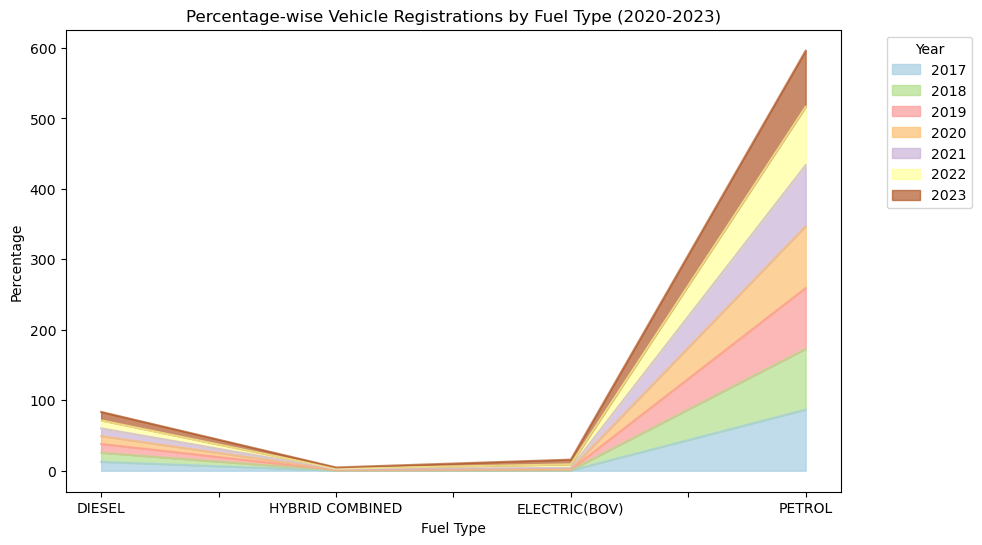

In [53]:
plt.figure(figsize=(10, 6))
fuelTypePercentages.T.plot(kind='area', colormap='Paired', alpha=0.7, figsize=(10, 6))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2020-2023)')
plt.xlabel('Fuel Type')
plt.ylabel('Percentage')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The conclusion based upon the analysis of the various plots suggests that:

- Petrol remains the dominant fuel type in the market during the specified period (2017-2023) but sees a slight decrease in the dependency over the years.
- The percentage of Electric (EV) registrations is increasing over the years (as of 2023 stands at 6.8%), this indicates a rising interest in electric mobility and increased adoption among the Indian masses.
- The Stable percentages for Diesel registrations suggests a relatively consistent demand or market presence for diesel-powered vehicle primarily driven by economic factors, industry requirements, or changing consumer preferences.

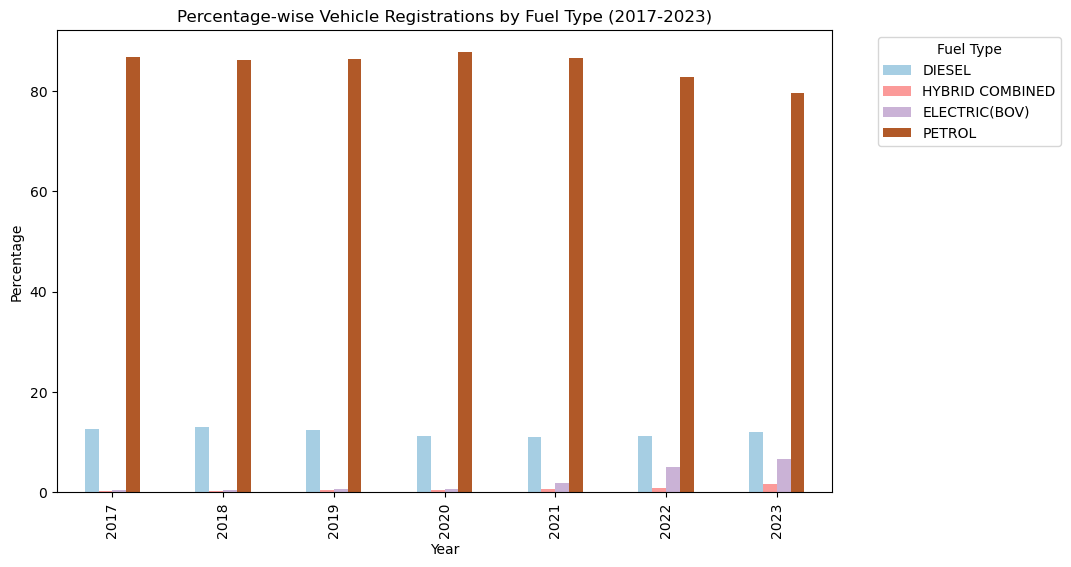

In [56]:
fuelTypePercentages.plot(kind='bar', colormap='Paired', figsize=(10, 6))
plt.title('Percentage-wise Vehicle Registrations by Fuel Type (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [58]:
numericalColumns = finalDatasetFuelType.select_dtypes(include=['int64', 'float64']).columns
datetimeColumns = finalDatasetFuelType['Month']
numericalData = finalDatasetFuelType[numericalColumns]

## Performing PCA

In [61]:
scaler = StandardScaler()
numericalScaledData = scaler.fit_transform(numericalData)
    
scaledData = pd.DataFrame(numericalScaledData, columns=numericalColumns)
#scaledData['Month'] = datetimeColumns

In [63]:
pca = PCA(random_state = 42)
pca.fit(scaledData)

PCA(random_state=42)

In [65]:
dataPCA = pca.transform(scaledData)

In [67]:
dfPCA = pd.DataFrame(dataPCA, columns = [f'PC{x +1}' for x in range(len(scaledData.columns))])

In [69]:
dfPCA.head()

,PC1,PC2,PC3,PC4
0,-1.316887,-0.102284,-0.987407,-0.084505
1,-0.962122,1.025255,-0.604942,-0.032840
2,-1.240609,0.111823,-0.846245,-0.054914
3,-1.020505,0.698605,-0.385185,0.048909
4,-1.145863,0.225432,-0.353466,0.080403


In [71]:
PCAsummary = pd.DataFrame({'Standard Deviation':dfPCA.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

### Displaying PCA summary and components

In [74]:
PCAsummary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.397175,0.483780,0.483780
PC2,1.325811,0.435623,0.919403
PC3,0.486647,0.058692,0.978095
PC4,0.297305,0.021905,1.000000


In [76]:
factorLoadings = pd.DataFrame(pca.components_, columns = scaledData.columns, index = dfPCA.columns).T

In [78]:
factorLoadings.style.background_gradient(cmap = 'Blues')

,PC1,PC2,PC3,PC4
DIESEL,-0.267491,-0.655363,-0.686863,-0.164823
HYBRID COMBINED,0.671072,-0.217739,0.114250,-0.699427
ELECTRIC(BOV),0.683330,-0.152072,-0.278778,0.657432
PETROL,-0.105689,-0.707081,0.661399,0.226756


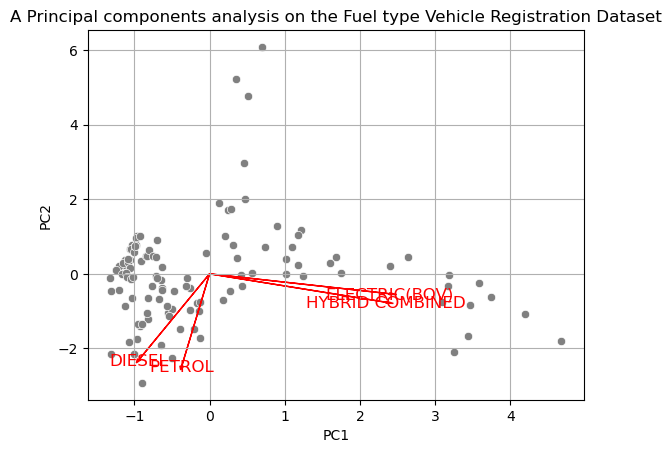

In [80]:
indexNames = factorLoadings.index

sns.scatterplot(dfPCA, x = 'PC1', y = 'PC2', color = 'grey')

for i in range(len(factorLoadings['PC1'])):
    plt.arrow(0, 0, factorLoadings['PC1'][i] * 3.5, factorLoadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factorLoadings['PC1'][i] * 3.5), factorLoadings['PC2'][i]* 3.5, indexNames[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis on the Fuel type Vehicle Registration Dataset')
plt.grid(True)
plt.show()

## Extracting Segments

### K-Means clustering analysis

K-Means clustering is an unsupervised machine learning algorithm that groups data points into k distinct clusters based on their similarity. It's an iterative process that aims to minimize the within-cluster sum of squares, meaning it tries to create clusters where data points within each group are as close as possible to each other and far from points in other groups.

Before implementing clustering, we meticulously prepare the data. This involves addressing missing values, turning text labels into numerical codes, and representing ordinal features (like sizes or grades) as separate dummy variables. Once cleaned and readied, the data is fed to the Scikit-Learn K-Means algorithm. This algorithm helps us identify the optimal number of clusters by generating an "elbow curve."

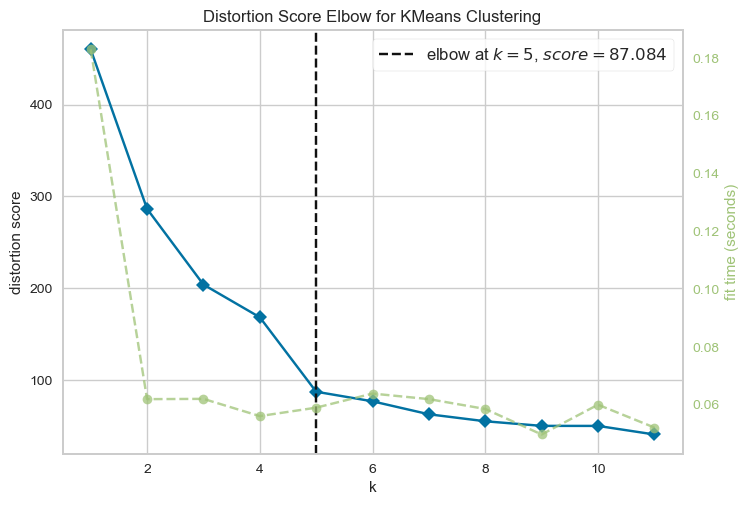

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [84]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 12))
visualizer.fit(scaledData)

# Display the elbow p
visualizer.show()

Based on the elbow method, the optimal number of clusters for the given data is likely **k=5**. This means that the KMeans algorithm can effectively group the data points into five distinct clusters with minimal distortion.

In [86]:
# Applying K-means clustering
kmeans = KMeans(n_clusters=5)  
finalDatasetFuelType['Cluster'] = kmeans.fit_predict(scaledData)

# Visualize or analyze the clusters
print(finalDatasetFuelType['Cluster'].value_counts())

Cluster
0    39
3    27
4    23
2    14
1    12
Name: count, dtype: int64


More registerations belong to **Cluster 1 & 4**

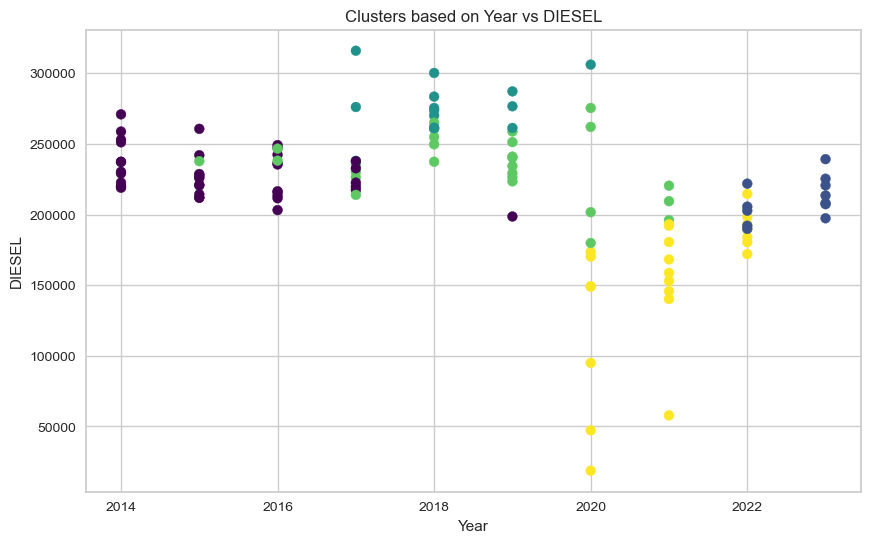

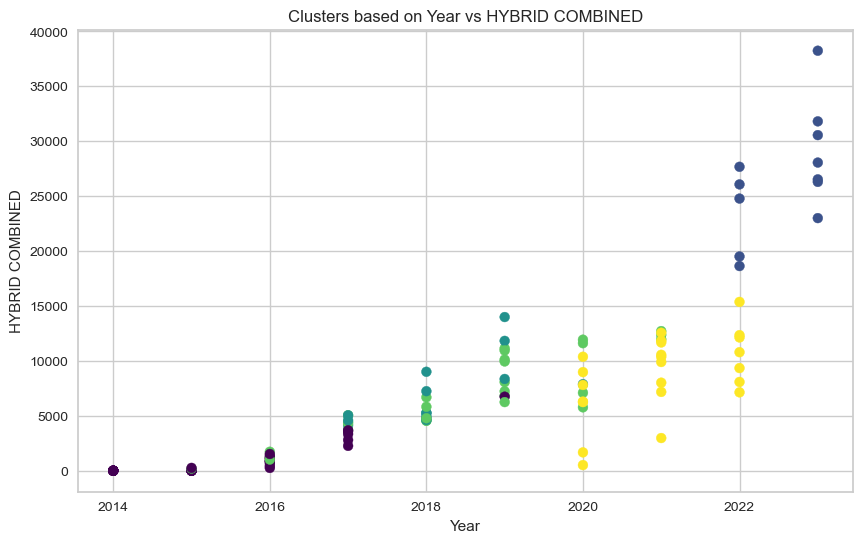

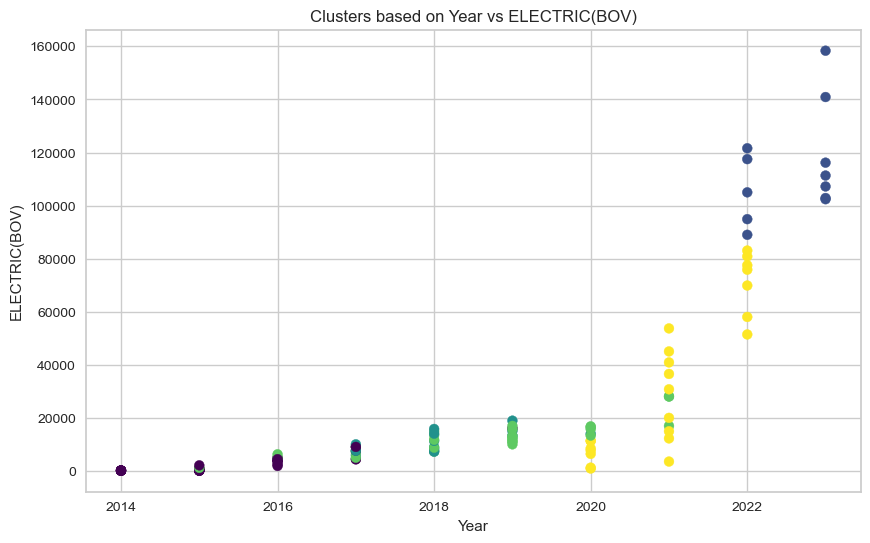

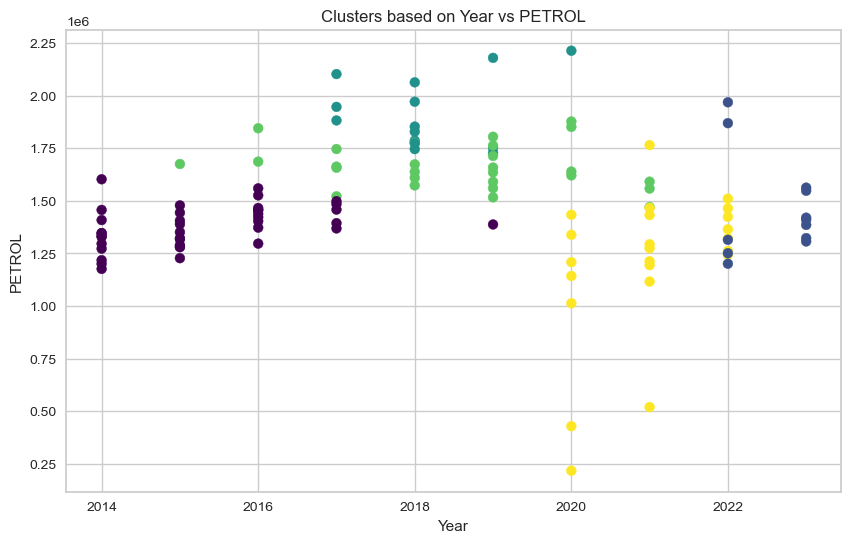

In [90]:
for feature in finalColumns[1:]: 
    plt.figure(figsize=(10, 6))
    plt.scatter(x='Year', y=feature, data=finalDatasetFuelType, c=finalDatasetFuelType['Cluster'], cmap='viridis', s=50)
    plt.xlabel('Year')
    plt.ylabel(feature)
    plt.title(f'Clusters based on Year vs {feature}')
    plt.show()

In [91]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(scaledData)
finalDatasetFuelType['Cluster Number'] = kmeans.labels_ 
# Label assigned for each data point
print (kmeans.labels_) 

# Gives within-cluster sum of squares. 
print (kmeans.inertia_) 

# Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.n_iter_) 

# Location of the centroids on each cluster.
print(kmeans.cluster_centers_)  

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 3 3
 3 0 0 0 0 3 3 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 0
 0 2 2 2 2 2 1 1 0 0 1 1 1 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4
 4 4 4 4]
96.88337937070457
7
[[ 0.75772049 -0.06129441 -0.35284732  0.99949007]
 [-0.70761897  0.56213596  0.73023695 -0.29548184]
 [-2.56209926 -0.28014609 -0.47543628 -2.09817912]
 [ 0.22000918 -0.78670828 -0.58982242 -0.30854652]
 [-0.11114291  2.61855015  2.63209488  0.06718711]]


In [92]:
finalDatasetFuelType.head()

,Month,DIESEL,HYBRID COMBINED,ELECTRIC(BOV),PETROL,Year,Cluster,Cluster Number
0,2014-01-01,270915,3,232,1347016,2014,0,3
1,2014-02-01,219601,4,171,1176669,2014,0,3
2,2014-03-01,258723,3,220,1329273,2014,0,3
3,2014-04-01,222632,3,252,1296500,2014,0,3
4,2014-05-01,237336,7,186,1408836,2014,0,3


In [94]:
from collections import Counter
Counter(kmeans.labels_)

Counter({3: 42, 0: 35, 1: 20, 4: 10, 2: 8})

In [98]:
kmeans.cluster_centers_[:,1]

array([-0.06129441,  0.56213596, -0.28014609, -0.78670828,  2.61855015])

## Profiling Segments

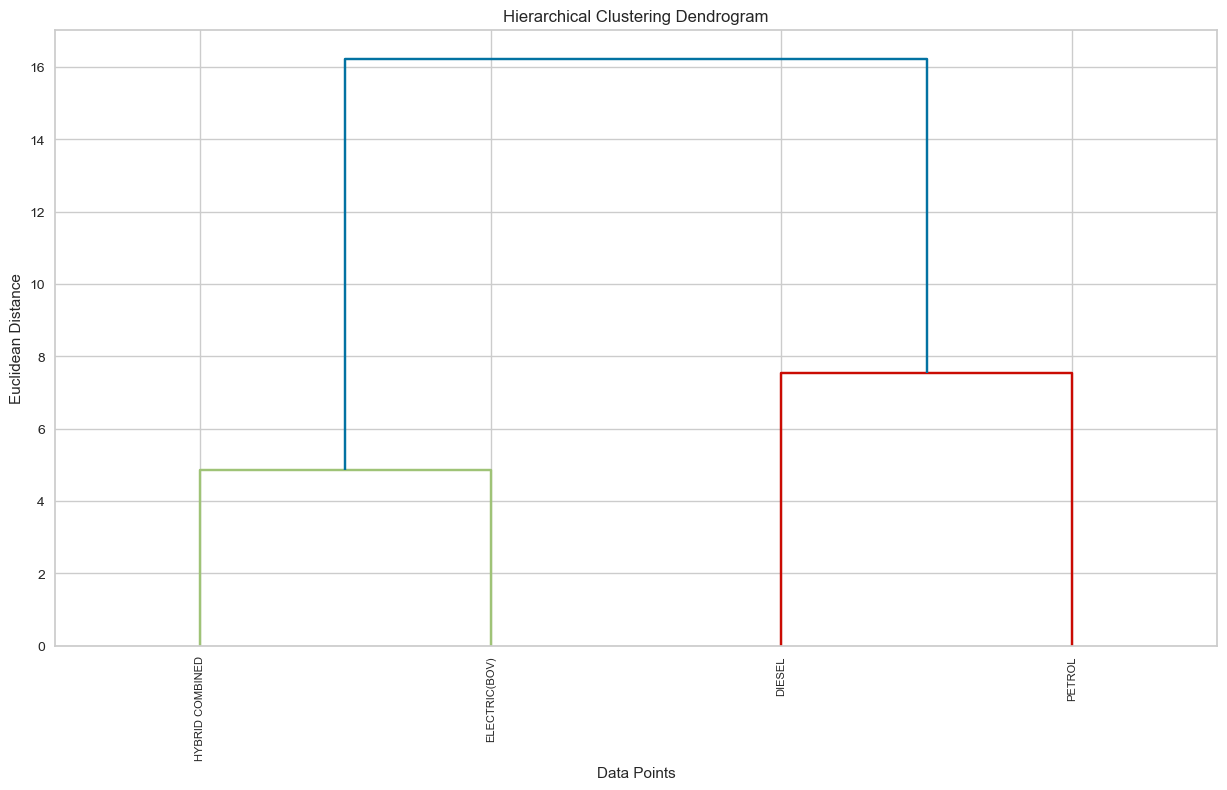

In [101]:
from scipy.cluster.hierarchy import linkage, dendrogram

transposed_data = scaledData.transpose()

# Perform hierarchical clustering
MD_vclust = linkage(transposed_data, method='complete')

# Create a dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(15, 8))
dendrogram(MD_vclust, labels=transposed_data.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

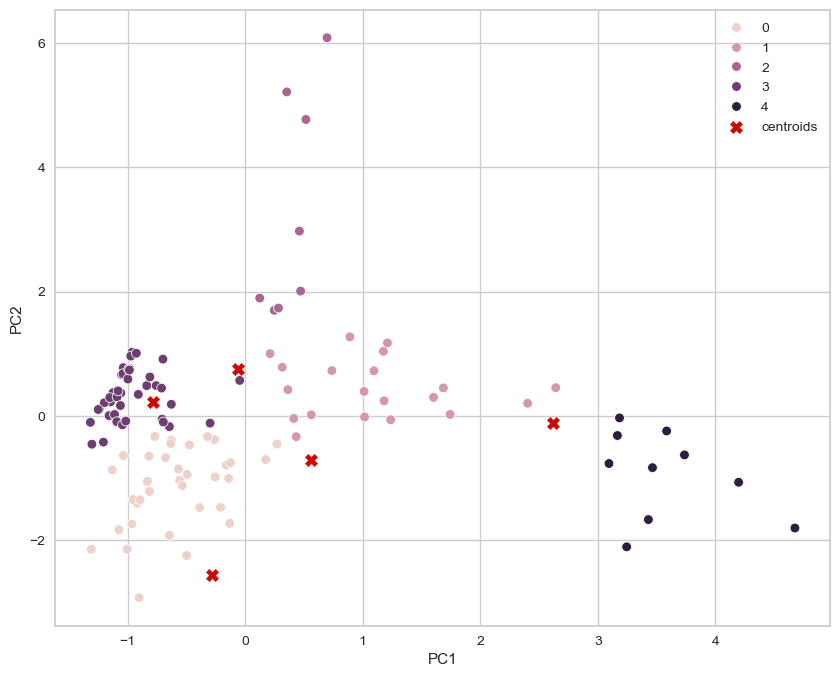

In [103]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=dfPCA, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()

## Describing Segments

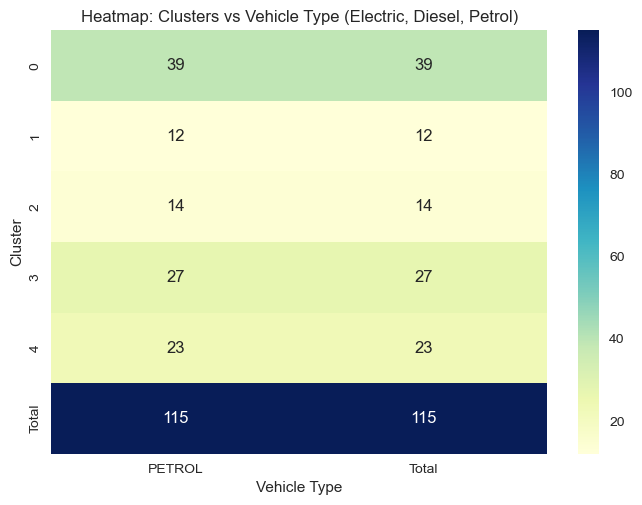

In [106]:
finalColumns = ['Month', 'DIESEL', 'HYBRID COMBINED', 'ELECTRIC(BOV)', 'PETROL', 'Year', 'Cluster', 'Cluster Number']

selectedFeatures = finalDatasetFuelType[finalColumns]
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'DIESEL', 'PETROL']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()

Based on the above heatmap, here are some observations:

- **Cluster 0:** This cluster is heavily dominated by electric vehicles, significantly outnumbering diesel and petrol vehicles.
- **Cluster 1:** This cluster has a more balanced distribution, with petrol vehicles being the most common, followed by electric and diesel.
- **Cluster 2:** Diesel vehicles are the clear majority in this cluster, with very few electric or petrol vehicles.
- **Cluster 3:** This cluster has a moderate number of electric vehicles, followed by diesel and petrol.

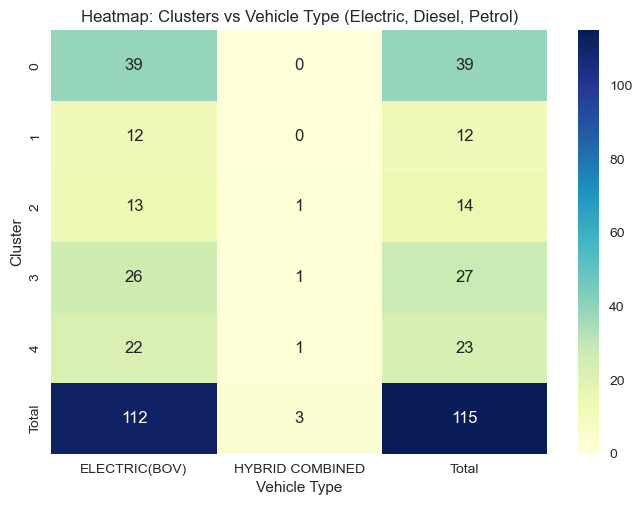

In [109]:
selectedFeatures['Vehicle Type'] = selectedFeatures[['ELECTRIC(BOV)', 'HYBRID COMBINED']].idxmax(axis=1).apply(lambda x: x.replace('/', '_'))
heatmapData = pd.crosstab(selectedFeatures['Cluster'], selectedFeatures['Vehicle Type'], margins=True, margins_name='Total')

sns.heatmap(heatmapData, annot=True, fmt='d', cmap='YlGnBu', cbar=True)
plt.title('Heatmap: Clusters vs Vehicle Type (Electric, Diesel, Petrol)')
plt.show()

Based on the above heatmap, here are some observations:

- **Cluster 0:** This cluster is dominated by Electric vehicles, with a significantly higher count compared to Diesel and Petrol vehicles.
- **Cluster 1:** This cluster has a more balanced distribution of vehicle types, with Petrol vehicles having the highest count, followed by Electric and Diesel vehicles.
- **Cluster 2:** This cluster is primarily composed of Diesel vehicles, with a very low count of Electric and Petrol vehicles.
- **Cluster 3:** This cluster has a moderate count of Electric vehicles, followed by Diesel and Petrol vehicles.

## Selecting (the) Target Segment(s)

In [113]:
from sklearn.preprocessing import LabelEncoder
finalDatasetFuelType['ELECTRIC(BOV)']= LabelEncoder().fit_transform(finalDatasetFuelType['ELECTRIC(BOV)'])
electricBOV= finalDatasetFuelType.groupby('Cluster Number')['ELECTRIC(BOV)'].mean()
electricBOV= electricBOV.to_frame().reset_index()
electricBOV

,Cluster Number,ELECTRIC(BOV)
0,0,63.057143
1,1,92.250000
2,2,45.750000
3,3,24.809524
4,4,109.500000


In [115]:
# Calculating the mean
from sklearn.preprocessing import LabelEncoder
finalDatasetFuelType['HYBRID COMBINED']= LabelEncoder().fit_transform(finalDatasetFuelType['HYBRID COMBINED'])
petrolHybrid= finalDatasetFuelType.groupby('Cluster Number')['HYBRID COMBINED'].mean()
petrolHybrid= petrolHybrid.to_frame().reset_index()
petrolHybrid

,Cluster Number,HYBRID COMBINED
0,0,52.657143
1,1,78.150000
2,2,43.125000
3,3,13.285714
4,4,97.500000


In [117]:
# Calculating the mean
from sklearn.preprocessing import LabelEncoder
finalDatasetFuelType['HYBRID COMBINED']= LabelEncoder().fit_transform(finalDatasetFuelType['HYBRID COMBINED'])
hybridCombined= finalDatasetFuelType.groupby('Cluster Number')['HYBRID COMBINED'].mean()
hybridCombined= hybridCombined.to_frame().reset_index()
hybridCombined

,Cluster Number,HYBRID COMBINED
0,0,52.657143
1,1,78.150000
2,2,43.125000
3,3,13.285714
4,4,97.500000


In [119]:
segment = electricBOV.merge(hybridCombined, on = 'Cluster Number', how = 'left')
segment

,Cluster Number,ELECTRIC(BOV),HYBRID COMBINED
0,0,63.057143,52.657143
1,1,92.250000,78.150000
2,2,45.750000,43.125000
3,3,24.809524,13.285714
4,4,109.500000,97.500000


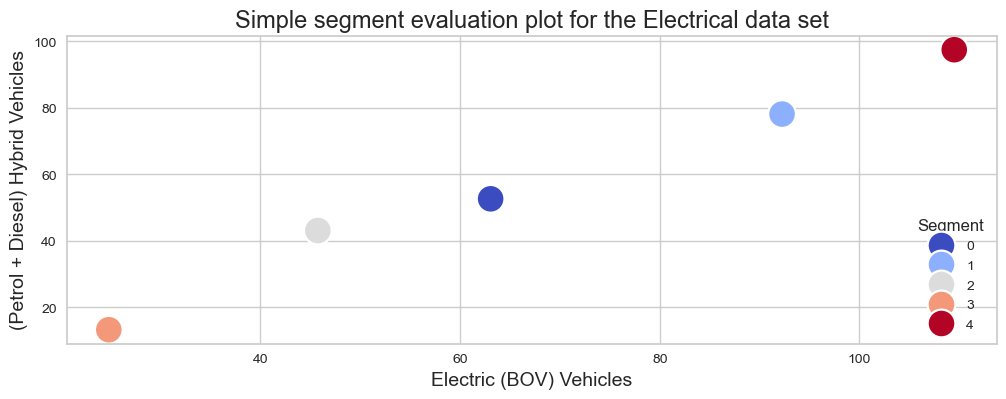

In [121]:
# Target segments

plt.figure(figsize = (12,4))
sns.scatterplot(x = "ELECTRIC(BOV)", y = "HYBRID COMBINED",data=segment,s=400, hue='Cluster Number', palette='coolwarm')
plt.title("Simple segment evaluation plot for the Electrical data set",
          fontsize = 17) 
plt.xlabel("Electric (BOV) Vehicles", fontsize = 14) 
plt.ylabel("(Petrol + Diesel) Hybrid Vehicles", fontsize = 14) 
plt.legend(title='Segment', loc='lower right')
plt.show()

- The data points are spread across all four quadrants of the graph, suggesting that there is a diversity in terms of both electric and hybrid vehicle adoption across the identified segments.
- There seems to be a concentration of points in the lower left and upper right quadrants. This could imply that some segments have a preference for either electric or hybrid vehicles, while others have a more balanced mix.

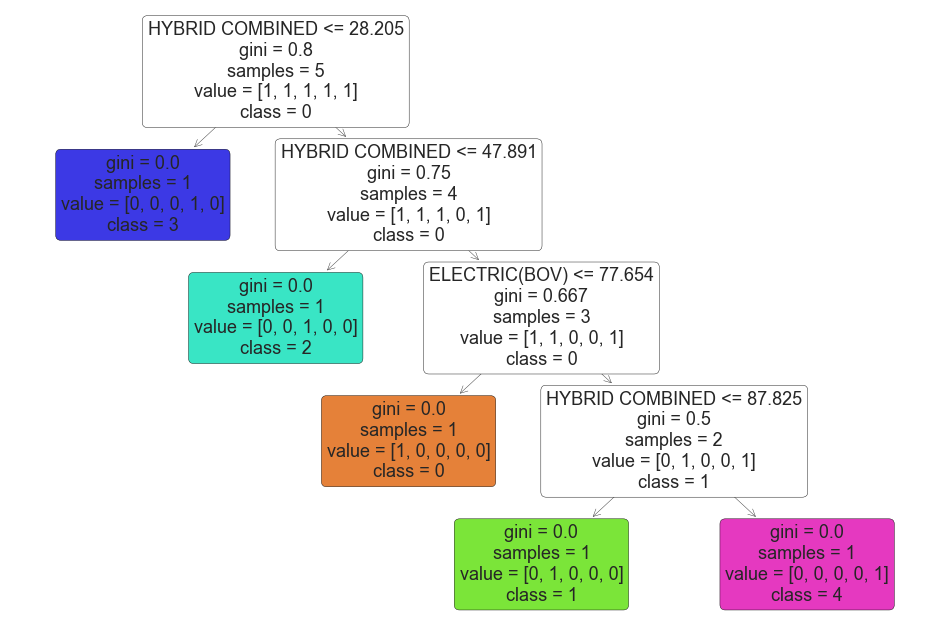

In [124]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer


features = ['ELECTRIC(BOV)', 'HYBRID COMBINED']
target = 'Cluster Number'

X = segment[features]
y = segment[target]

# Creating a decision tree
tree = DecisionTreeClassifier()
tree.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=features, class_names=[str(i) for i in segment[target].unique()], filled=True, rounded=True)
plt.show()

- Target Segment 0: Prioritize marketing EVs' environmental benefits and lower running costs. Ensure easy access to charging infrastructure information.
- Segment 4: Address price concerns and highlight the flexibility of having both hybrid and electric options.
- Segments 1 and 5: Offer a diverse range of EV and hybrid options cater to various needs and budgets. Emphasize fuel efficiency and the evolving charging infrastructure landscape.
- Segments 2 and 3: Focus on the practicality and reliability of hybrids while acknowledging the growing appeal of EVs. Address range anxiety concerns.

# II. Statewise Charging Station Sanctioned

In [128]:
datasetStateChargingStation = pd.read_csv("Statewise Charging Stations Sanctioned.csv")

In [130]:
datasetStateChargingStation.head()

,State,Sanctioned State Wise Charging Stations
0,Andhra Pradesh,266
1,Assam,20
2,Bihar,37
3,Chandigarh,70
4,Chattisgarh,25


In [132]:
datasetStateChargingStation.columns.tolist()

['State', 'Sanctioned State Wise Charging Stations']

In [134]:
datasetStateChargingStation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 2 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State                                    26 non-null     object
 1   Sanctioned State Wise Charging Stations  26 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 548.0+ bytes


In [136]:
datasetStateChargingStation.shape

(26, 2)

In [138]:
print(pd.isnull(datasetStateChargingStation).sum())

State                                      0
Sanctioned State Wise Charging Stations    0
dtype: int64


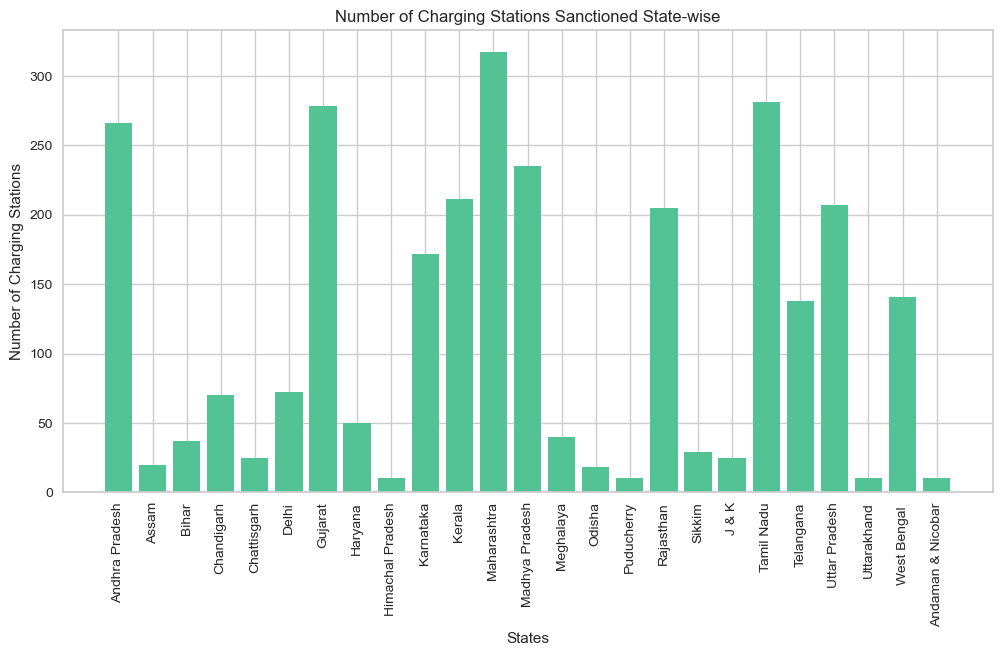

In [140]:
datasetStateChargingStation = datasetStateChargingStation[datasetStateChargingStation['State'] != 'Total']

# Plotting bar graph
plt.figure(figsize=(12, 6))
plt.bar(datasetStateChargingStation['State'], datasetStateChargingStation['Sanctioned State Wise Charging Stations'], color='#53c294')
plt.xlabel('States')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations Sanctioned State-wise')
plt.xticks(rotation=90)
plt.show()

- **Maharashtra, Uttar Pradesh, and Gujarat** have the highest number of sanctioned charging stations, with over 200 stations each.

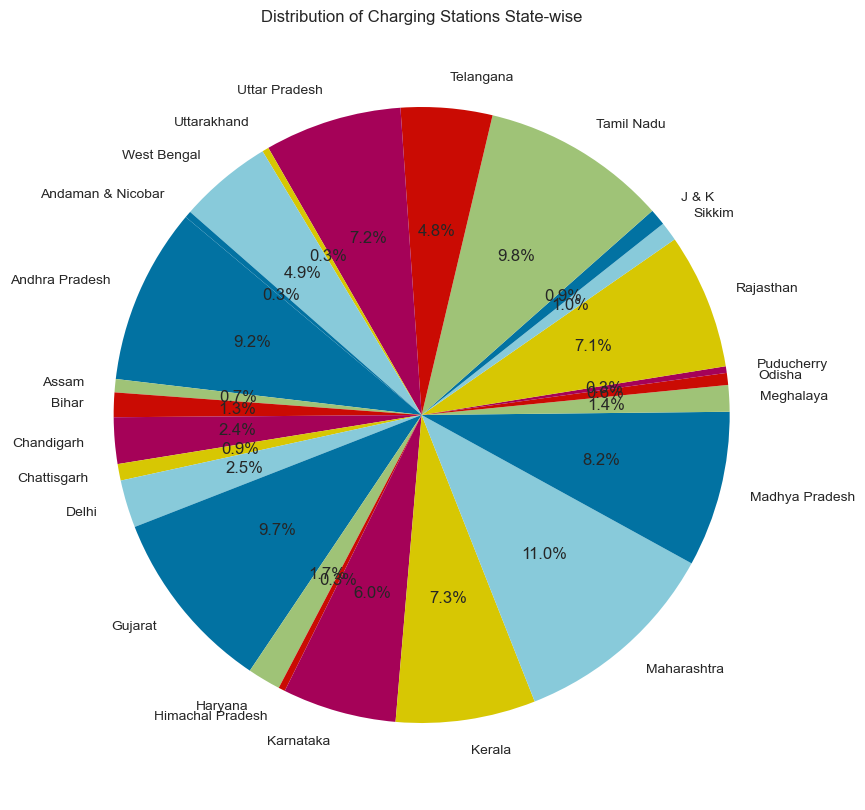

Total Charging Stations: 2877


In [143]:
# Plotting pie chart for the distribution
plt.figure(figsize=(10, 10))
plt.pie(datasetStateChargingStation['Sanctioned State Wise Charging Stations'], labels=datasetStateChargingStation['State'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Charging Stations State-wise')
plt.show()

# Display total number of charging stations
totalChargingStations = sum(datasetStateChargingStation['Sanctioned State Wise Charging Stations'])
print(f'Total Charging Stations: {totalChargingStations}')

- The distribution of charging stations is uneven across states, with a few states having a large number of stations and many states having no stations at all. This could lead to challenges for electric vehicle adoption in some parts of the country.

# III. Citywise Charging Station Sanctioned

In [147]:
datasetCityChargingStation = pd.read_csv("Citywise Charging Stations Sanctioned.csv")

In [149]:
datasetCityChargingStation.head()

,City,Sanctioned City Wise Charging Stations,EV Charging Stations Installed as on dated: 17-03-2022
0,Vijayawada,92,NaN
1,Vishakhapatnam,71,NaN
2,Tirupati,68,NaN
3,Kakinada,35,NaN
4,Jorhat,10,NaN


In [151]:
datasetCityChargingStation.columns.tolist()

['City',
 'Sanctioned City Wise Charging Stations',
 'EV Charging Stations Installed as on dated: 17-03-2022']

In [153]:
datasetCityChargingStation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   City                                                    69 non-null     object 
 1   Sanctioned City Wise Charging Stations                  69 non-null     int64  
 2   EV Charging Stations Installed as on dated: 17-03-2022  5 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ KB


In [155]:
datasetCityChargingStation.shape

(69, 3)

In [157]:
print(pd.isnull(datasetCityChargingStation).sum())

City                                                       0
Sanctioned City Wise Charging Stations                     0
EV Charging Stations Installed as on dated: 17-03-2022    64
dtype: int64


In [159]:
datasetCityChargingStation['EV Charging Stations Installed as on dated: 17-03-2022'].fillna(0, inplace=True)
print(pd.isnull(datasetCityChargingStation).sum())

City                                                      0
Sanctioned City Wise Charging Stations                    0
EV Charging Stations Installed as on dated: 17-03-2022    0
dtype: int64


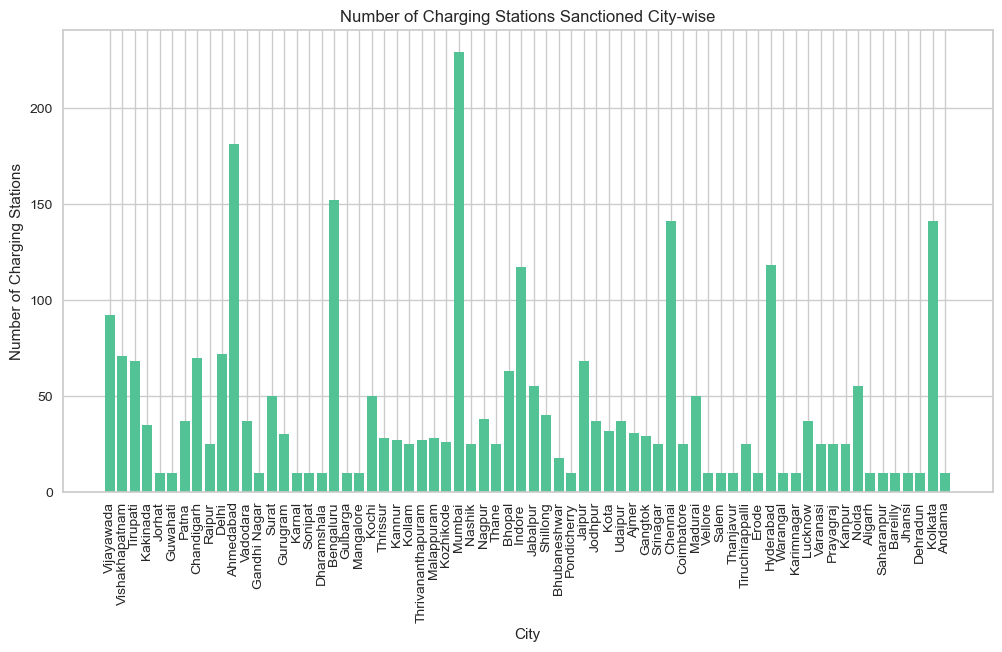

In [161]:
datasetCityChargingStation = datasetCityChargingStation[datasetCityChargingStation['City'] != 'Total']

# Plotting bar graph
plt.figure(figsize=(12, 6))
plt.bar(datasetCityChargingStation['City'], datasetCityChargingStation['Sanctioned City Wise Charging Stations'], color='#53c294')
plt.xlabel('City')
plt.ylabel('Number of Charging Stations')
plt.title('Number of Charging Stations Sanctioned City-wise')
plt.xticks(rotation=90)
plt.show()

- There is a significant variation in the number of sanctioned charging stations across different cities. Some cities, such as Delhi and Mumbai, have a much higher number of stations than others.


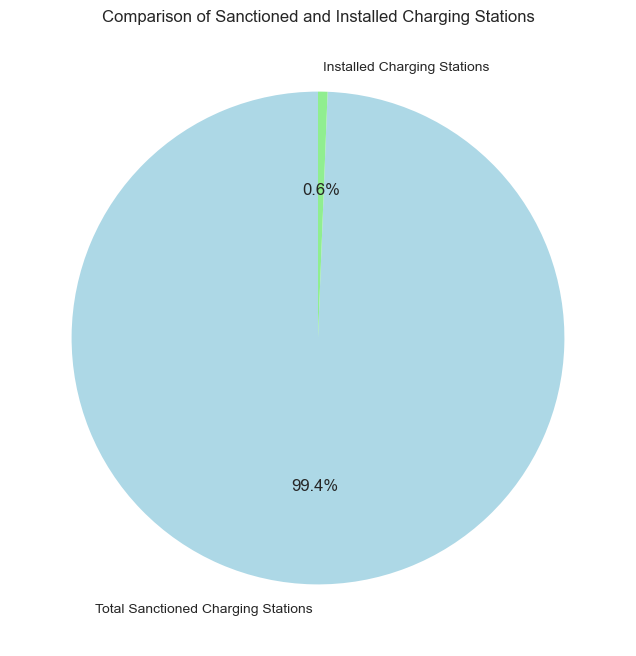

In [168]:
totalChargingStations = sum(datasetCityChargingStation['Sanctioned City Wise Charging Stations'])
installedChargingStations = sum(datasetCityChargingStation['EV Charging Stations Installed as on dated: 17-03-2022'])

# Data for the pie chart
labels = ['Total Sanctioned Charging Stations', 'Installed Charging Stations']
sizes = [totalChargingStations, installedChargingStations]

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
plt.title('Comparison of Sanctioned and Installed Charging Stations')
plt.show()